In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/AI workshop 2024 /Task-1/WHR-2024-5CS037.csv')

1. Load the dataset and display the first 10 rows.

In [ ]:
dataframe.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


2. Identify the number of rows and columns in the dataset.


In [ ]:
rows_col = dataframe.shape
print(f"No.of rows:{rows_col[0]},\n No.of columns:{rows_col[1]}")

No.of rows:143,
 No.of columns:9


3. List all the columns and their data types.

In [ ]:
dataframe.dtypes

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


Calculate the mean, median, and standard deviation for the Score column.

In [ ]:
dataframe['score'].mean()

5.52758041958042

In [ ]:
dataframe['score'].median()

5.785

In [ ]:
dataframe['score'].std()

1.1707165099442995

Identify the country with the highest and lowest happiness scores.

In [ ]:
dataframe.loc[dataframe['score'].idxmax(),'Country name']

'Finland'

In [ ]:
dataframe.loc[dataframe['score'].idxmin(),'Country name']

'Afghanistan'

Check if there are any missing values in the dataset. If so, display the total count for each column.

In [ ]:
dataframe.isnull().sum()

,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [ ]:
filter = dataframe[dataframe['score']>7.5]
print ("Filtered data frames\n",filter)

Filtered data frames
   Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [ ]:
sorted = filter.sort_values(by='Log GDP per capita', ascending = False).head(10)
print ("Sorted data frames\n",sorted)

Sorted data frames
   Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [ ]:
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

dataframe['Happy_Category']= dataframe['score'].apply(categorize_happiness)
print (dataframe[['Country name', 'score','Happy_Category']].head(10))
ct = dataframe['Happy_Category'].value_counts()
print(ct)


  Country name  score Happy_Category
0      Finland  7.741           High
1      Denmark  7.583           High
2      Iceland  7.525           High
3       Sweden  7.344           High
4       Israel  7.341           High
5  Netherlands  7.319           High
6       Norway  7.302           High
7   Luxembourg  7.122           High
8  Switzerland  7.060           High
9    Australia  7.057           High
Happy_Category
Medium    70
High      56
Low       17
Name: count, dtype: int64


Data Visualizations:
• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

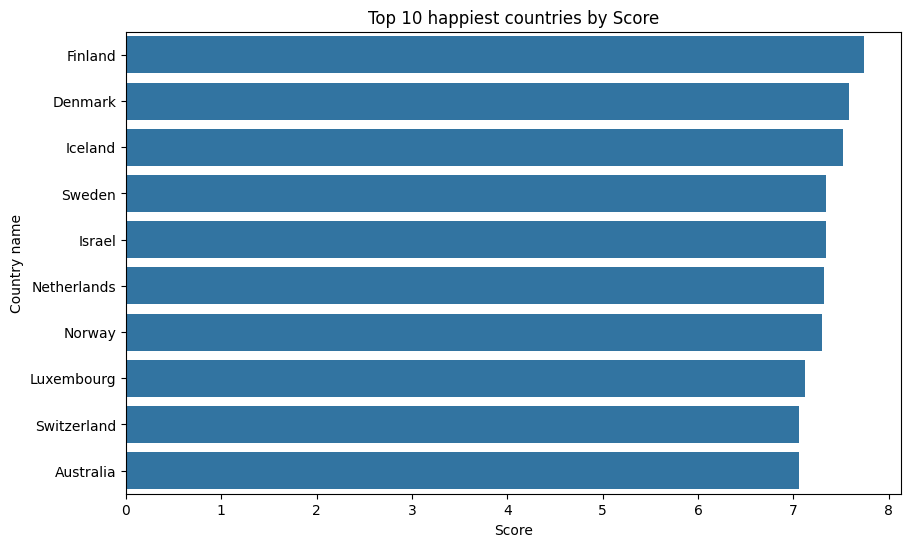

In [ ]:
dataframe.nlargest(10,'score')
plt.figure(figsize=(10,6))
sns.barplot(data=dataframe.nlargest(10,'score'),x='score',y='Country name')
plt.title('Top 10 happiest countries by Score')
plt.xlabel('Score')
plt.ylabel('Country name')
plt.show()

Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

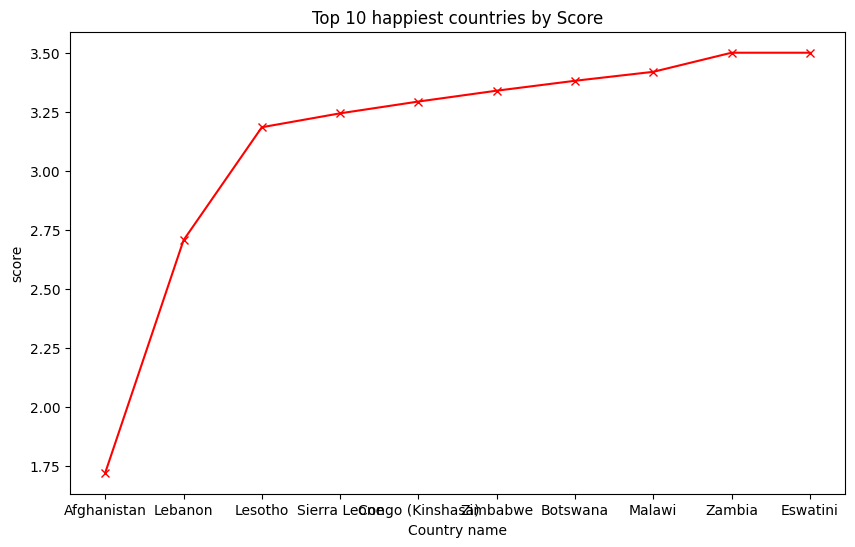

In [ ]:
dataframe.nsmallest(10,'score')
plt.figure(figsize=(10,6))
plt.plot(dataframe.nsmallest(10,'score')['Country name'],dataframe.nsmallest(10,'score')['score'],marker='x',color = 'red')
plt.title('Top 10 happiest countries by Score')
plt.xlabel('Country name')
plt.ylabel('score')
plt.show()

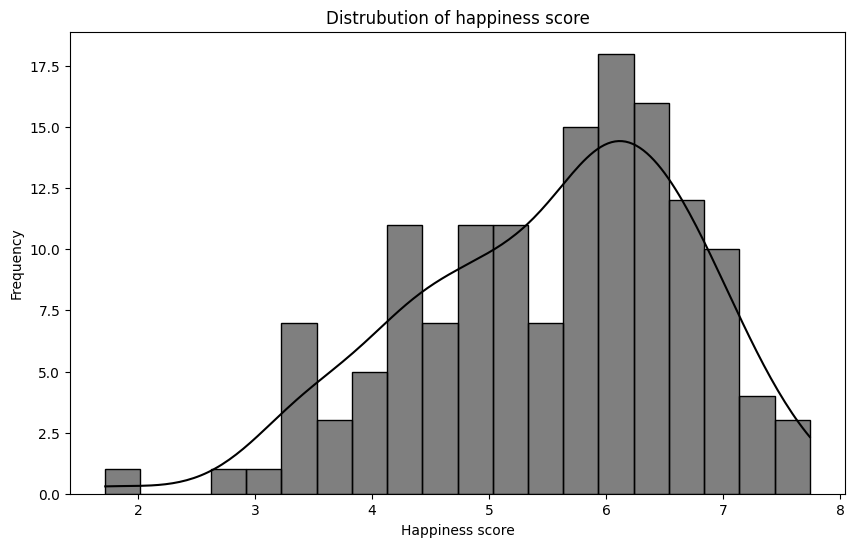

In [ ]:

plt.figure(figsize=(10,6))
sns.histplot(dataframe['score'],bins=20,kde= True,color='black')
plt.title('Distrubution of happiness score')
plt.xlabel('Happiness score')
plt.ylabel('Frequency')
plt.show()

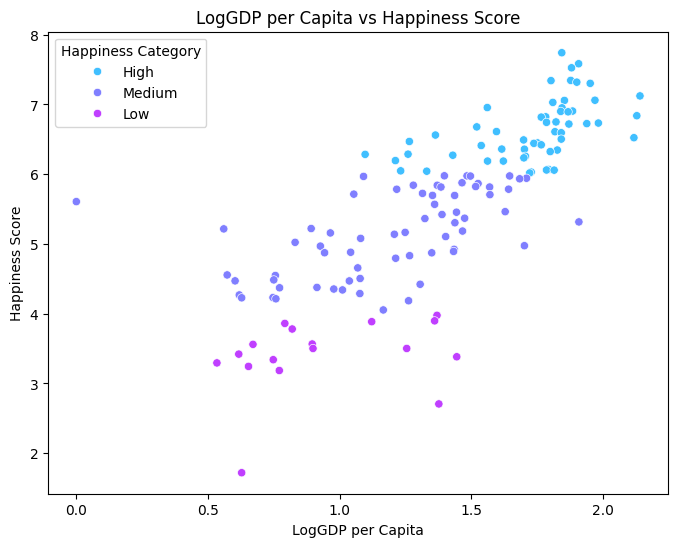

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataframe, x='Log GDP per capita', y='score', hue='Happy_Category', palette='cool')
plt.title('LogGDP per Capita vs Happiness Score')
plt.xlabel('LogGDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Happiness Category')
plt.show()

1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]

In [ ]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]
filtered_data = df[df['Country name'].isin(south_asian_countries)]
filtered_data.to_csv('C:\\Users\\user\\Desktop\\filtered.csv',index = False)

Task - 2 - Composite Score Ranking:
Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

4

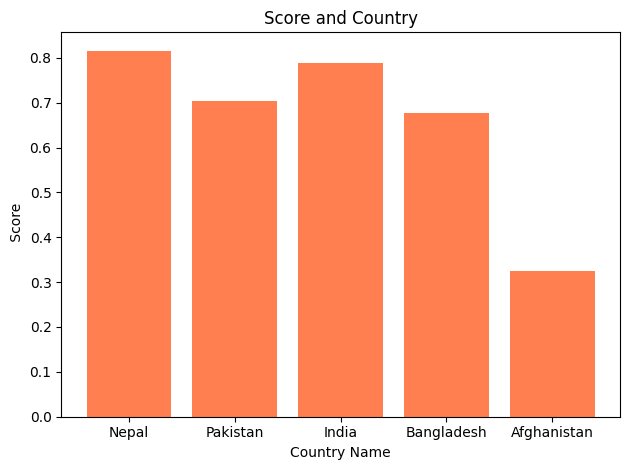

In [120]:
S_A_C = pd.read_csv('C:\\Users\\user\\Desktop\\filtered.csv')
S_A_C["Composite Score"]=0.40*S_A_C['Log GDP per capita']+0.30*S_A_C['Social support']+0.30*S_A_C['Healthy life expectancy']
S_A_C.sort_values(by='Composite Score', ascending=False)
top_5=S_A_C.head()
x=top_5['Country name']
y=top_5['Composite Score']
x,y
plt.xlabel("Country Name")
plt.ylabel(" Score")
plt.bar(x,y,color='coral')
plt.title("Score and Country")
plt.tight_layout()
plt.show()

Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.

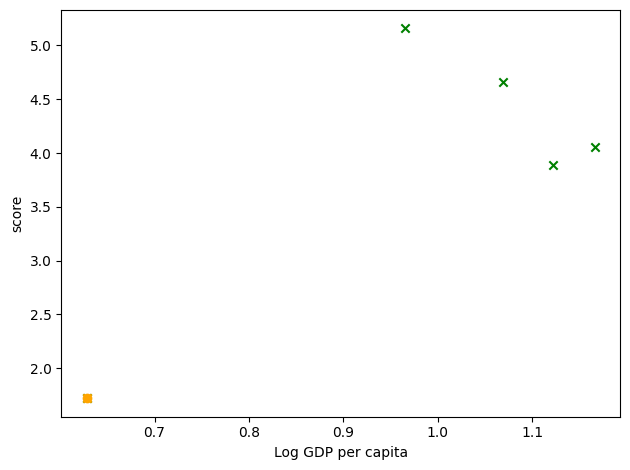

In [126]:
S_A_C['Log GDP per capita'],['score']
def outliers(col_name):
    Q1 = col_name.quantile(0.25)
    Q3 = col_name.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (col_name < lower_bound) | (col_name > upper_bound)
outliers_gdp =outliers(S_A_C['Log GDP per capita'])
outliers_scr =outliers(S_A_C['score'])


S_A_C['Is outlier'] = outliers_gdp|outliers_scr
S_A_C[S_A_C['Is outlier']]
x=S_A_C['Log GDP per capita']
y=S_A_C['score']
plt.scatter(x,y,color="green",marker='x')
plt.scatter(S_A_C[outliers_gdp]['Log GDP per capita'], S_A_C[outliers_gdp]['score'],
            c='orange',label='GDP Outliers',marker='x')
plt.scatter(S_A_C[outliers_scr]['Log GDP per capita'], S_A_C[outliers_scr]['score'],
            c='orange',label='Score Outliers',marker='o')
plt.xlabel("Log GDP per capita")
plt.ylabel("score")
plt.tight_layout()
plt.show()
# These outlier are the extreme values that are present in the columns.
#These outliers have some effects on the mean but a less effect on the  median and the mode.


Task - 4 - Exploring Trends Across Metrics:
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

0.801497903141921 0.8773326267276359


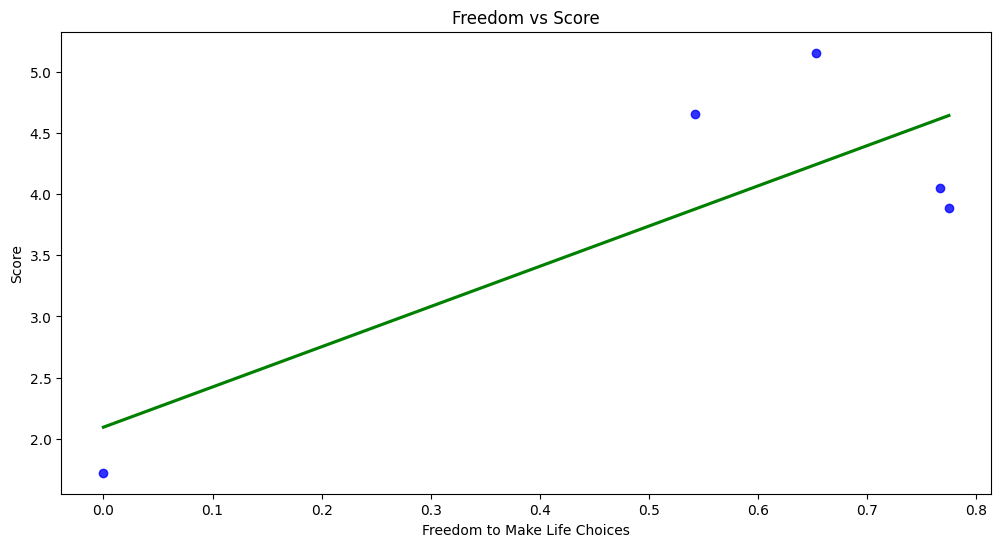

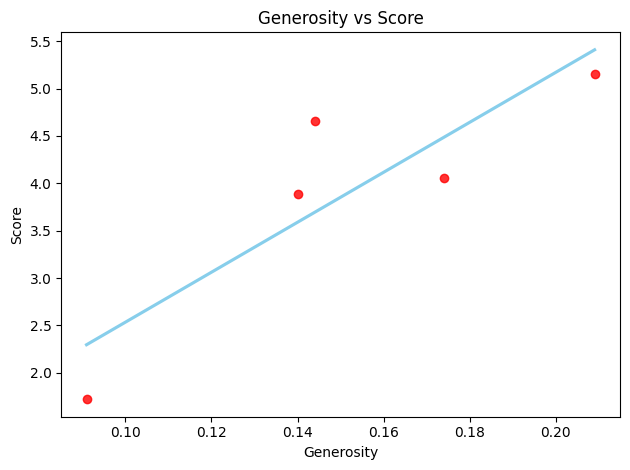

In [132]:
S_A_C['Freedom to make life choices'],['Generosity'],['score']
cor_freedom=S_A_C['Freedom to make life choices'].corr(scr,method='pearson')
cor_generosity=S_A_C['Generosity'].corr(scr,method='pearson')
print(cor_freedom,cor_generosity)
plt.figure(figsize=(12, 6))
sns.regplot(x='Freedom to make life choices',y='score',data=S_A_C,ci=None,scatter_kws={'color':'blue'},line_kws={'color':'green'})
plt.title('Freedom vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.show()
sns.regplot(x='Generosity',y='score',data=S_A_C,ci=None,scatter_kws={'color':'red'},line_kws={'color':'skyblue'})
plt.title('Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.

In [133]:
S_A_C['GDP-Score']=S_A_C['Log GDP per capita']-S_A_C['score']
sort_by_gap_asc = S_A_C.sort_values(by = 'GDP-Score',ascending = True)
sort_by_gap_des=S_A_C.sort_values(by = 'GDP-Score',ascending = False)
sort_by_gap_asc.head(3)
sort_by_gap_des.head(3)
#The reasons behind the positive gaps is  due to High GDP per capita in countries like Maldives Bhutan whereas reasons behind the Negative gaps is due to their low gdp.

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score,Is outlier,GDP-Score
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,0.3238,True,-1.093
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,0.6774,False,-2.764
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.7874,False,-2.888


Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

In [135]:
M_E_C = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]
filtered_data = dataframe[dataframe['Country name'].isin(M_E_C)]
mid_east = pd.DataFrame(filtered_data)
mid_east

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happy_Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


In [137]:
mid_east['score'].mean()
S_A_C['score'].mean()
mid_east['score'].std()
S_A_C['score'].std()
print("Mean scores for the region")
print(S_A_C['score'].mean(),mid_east['score'].mean())
print("Standard deviation for the region")
print(mid_east['score'].std(),S_A_C['score'].std())
if(mid_east['score'].mean()>S_A_C['score'].mean()):
    print("Happiness Score is highest in Middle East")
else:
    print("Happiness Score is highest in South East")

Mean scores for the region
3.8952000000000004 5.412100000000001
Standard deviation for the region
1.5662011684327144 1.3160025455902433
Happiness Score is highest in Middle East


2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.
• Plot bar charts comparing these charts.

========================For Middle East Countries=========================
4                   Israel
12                  Kuwait
21    United Arab Emirates
Name: Country name, dtype: object
124     Jordan
132      Yemen
141    Lebanon
Name: Country name, dtype: object
========================for South Asian countries============================
0       Nepal
1    Pakistan
2       India
Name: Country name, dtype: object
2          India
3     Bangladesh
4    Afghanistan
Name: Country name, dtype: object


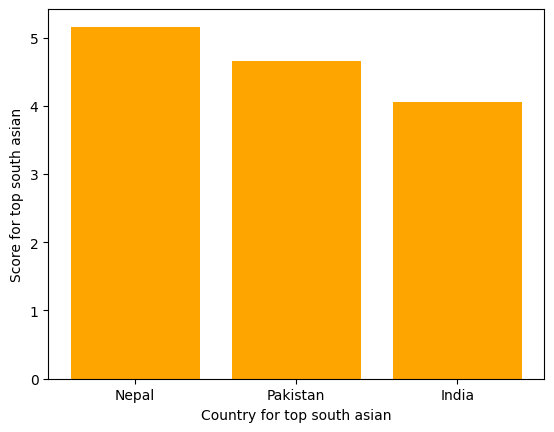

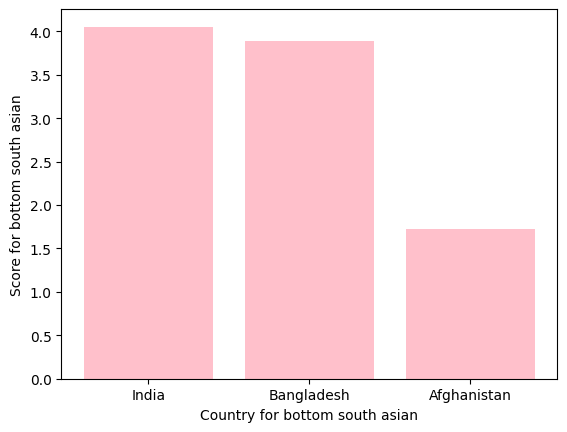

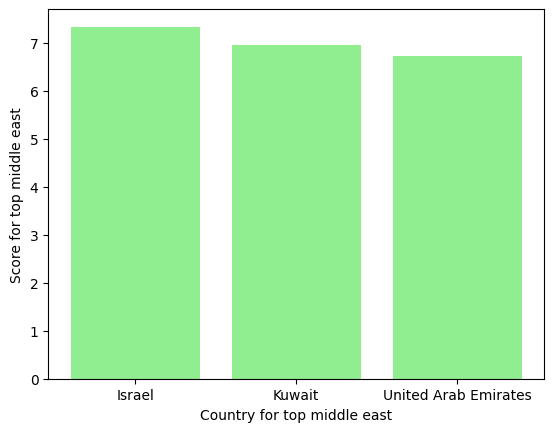

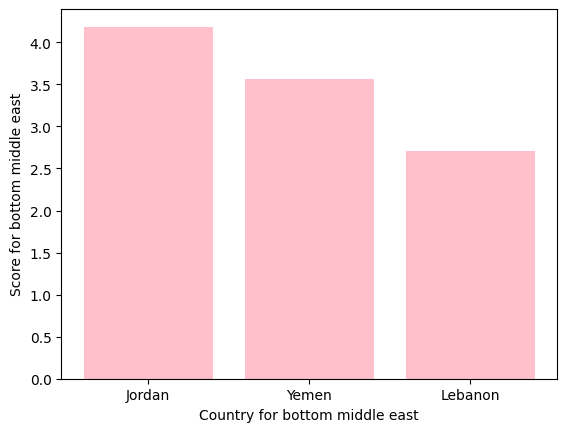

In [138]:
mid_east.sort_values(by='score', ascending=False)
S_A_C.sort_values(by = 'score',ascending=False)
print("========================For Middle East Countries=========================")
print(mid_east.sort_values(by='score', ascending=False)['Country name'].head(3))
print(mid_east.sort_values(by='score', ascending=False)['Country name'].tail(3))
print("========================for South Asian countries============================")
print(S_A_C.sort_values(by = 'score',ascending=False)['Country name'].head(3))
print(S_A_C.sort_values(by = 'score',ascending=False)['Country name'].tail(3))
x= S_A_C.sort_values(by = 'score',ascending=False)['Country name'].head(3)
y= S_A_C.sort_values(by = 'score',ascending=False)['score'].head(3)
plt.bar(x,y,color='orange')
plt.xlabel("Country for top south asian")
plt.ylabel("Score for top south asian")
plt.show()
x= S_A_C.sort_values(by = 'score',ascending=False)['Country name'].tail(3)
y= S_A_C.sort_values(by = 'score',ascending=False)['score'].tail(3)
plt.bar(x,y,color='pink')
plt.xlabel("Country for bottom south asian")
plt.ylabel("Score for bottom south asian")
plt.show()
x= mid_east.sort_values(by='score', ascending=False)['Country name'].head(3)
y= mid_east.sort_values(by='score', ascending=False)['score'].head(3)
plt.bar(x,y,color='lightgreen')
plt.xlabel("Country for top middle east")
plt.ylabel("Score for top middle east")
plt.show()
x= mid_east.sort_values(by='score', ascending=False)['Country name'].tail(3)
y= mid_east.sort_values(by='score', ascending=False)['score'].tail(3)
plt.bar(x,y,color='pink')
plt.xlabel("Country for bottom middle east")
plt.ylabel("Score for bottom middle east")
plt.show()

Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
• Which metrics show the largest disparity between the two regions?

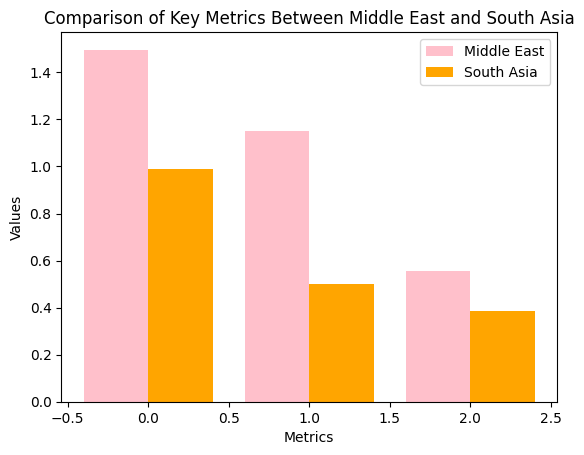

In [147]:
mid_east['Log GDP per capita'].mean()
mid_east['Social support'].mean()
mid_east['Healthy life expectancy'].mean()
SADF_GDP = S_A_C['Log GDP per capita'].mean()
SADF_social_support = S_A_C['Social support'].mean()
SADF_health_expectancy = S_A_C['Healthy life expectancy'].mean()
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
middle_east_values = [mid_east['Log GDP per capita'].mean(), mid_east['Social support'].mean(), mid_east['Healthy life expectancy'].mean()]
SADF_values = [SADF_GDP, SADF_social_support, SADF_health_expectancy]
bar_width = 0.40
x = np.arange(len(metrics))
plt.bar(x - bar_width/2, middle_east_values, width=bar_width, color='pink', label='Middle East')
plt.bar(x + bar_width/2, SADF_values, width=bar_width, color='orange', label='South Asia')
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Comparison of Key Metrics Between Middle East and South Asia")
plt.legend()
plt.show()


Happiness Disparity:
• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
• Which region has greater variability in happiness?

In [148]:
S_A_C['score'].max()-S_A_C['score'].min()
middle_east_range = mid_east['score'].max()-mid_east['score'].min()
SADF_CV = S_A_C['score'].std()/S_A_C['score'].mean()
middle_east_cv=mid_east['score'].std()/S_A_C['score'].mean()
print("Ranges: ",S_A_C['score'].max()-S_A_C['score'].min(),middle_east_range)
print("Coeffecient of variations: ",SADF_CV,middle_east_cv)

# Answer: According to the result for the coefficient of variation in both the regions the south asian country has a variation of 0.33 and that of middle east is 0.40 so the middle east has the greater variability in happiness.

Ranges:  3.4370000000000003 4.634
Coeffecient of variations:  0.3378523684509764 0.4020849169317915


Correlation Analysis:
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.
• Create scatter plots to visualize and interpret the relationships.

0.801497903141921 0.8773326267276358
0.8632202433827544 0.8632202433827544


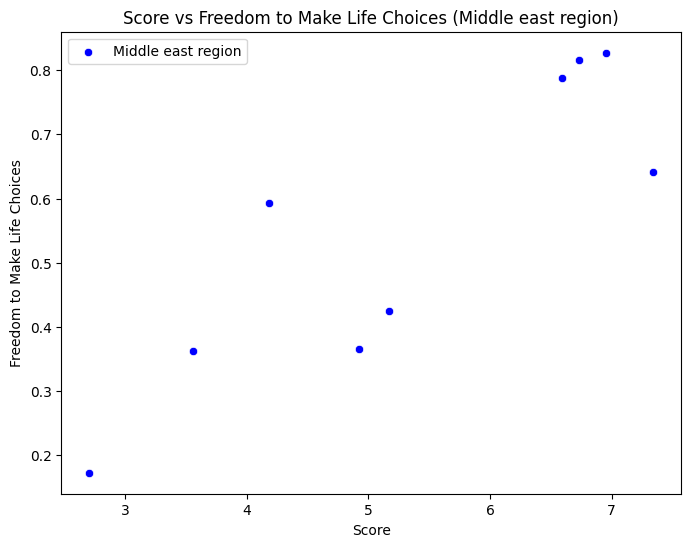

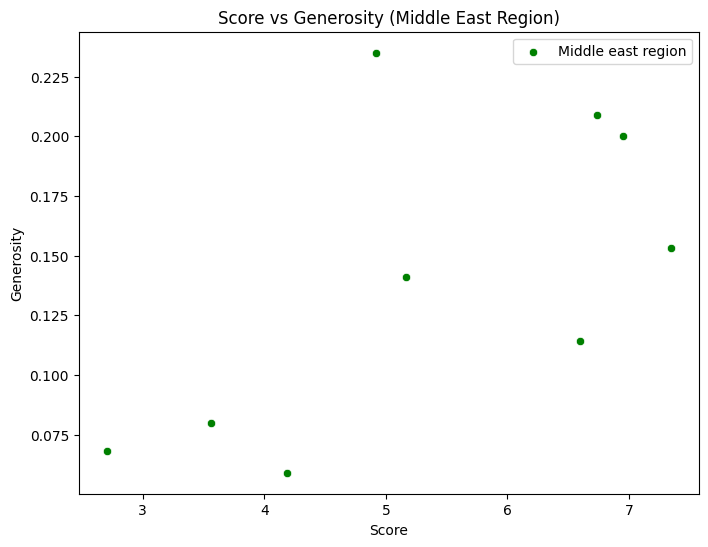

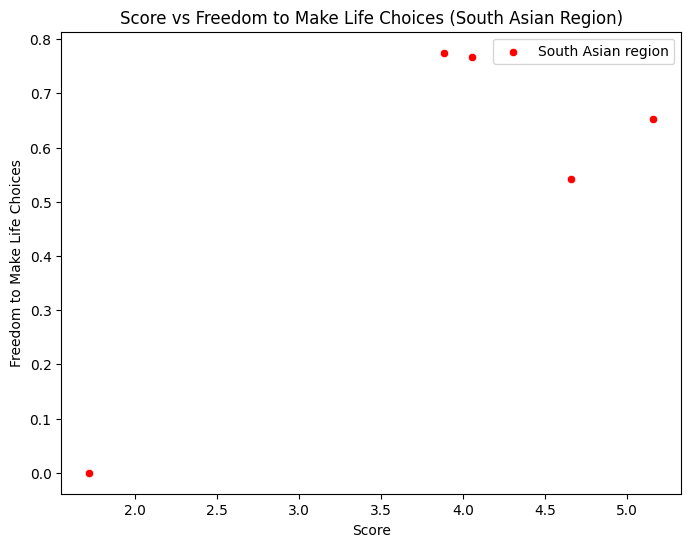

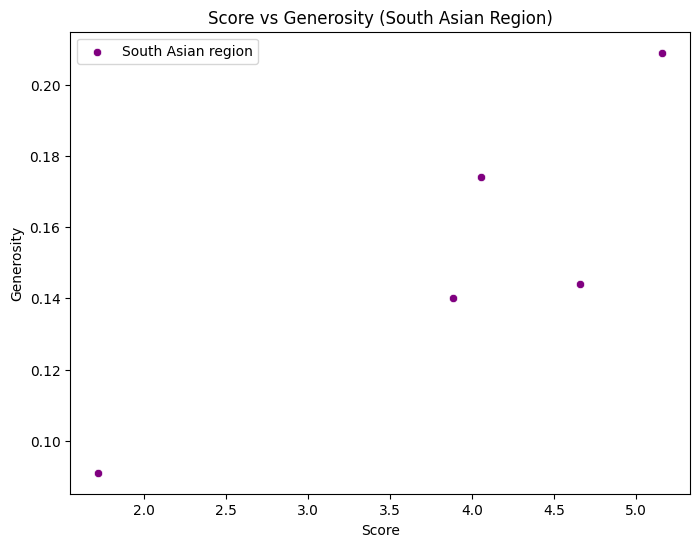

In [150]:
mid_east['score']
mid_east['Freedom to make life choices']
mid_east['Generosity']
S_A_C['score']
S_A_C['Freedom to make life choices']
S_A_C['Generosity']
corr_Sadf = S_A_C['score'].corr(S_A_C['Freedom to make life choices'],method='pearson')
corr_generosity=S_A_C['score'].corr(S_A_C['Generosity'],method='pearson')
print(corr_Sadf,corr_generosity)
corr_middle_east = mid_east['score'].corr(mid_east['Freedom to make life choices'],method='pearson')
corr_middle_east_generosity = mid_east['score'].corr(mid_east['Generosity'],method='pearson')
print(corr_middle_east,corr_middle_east)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=mid_east, x=mid_east['score'], y=mid_east['Freedom to make life choices'], color='blue', label='Middle east region')
plt.title('Score vs Freedom to Make Life Choices (Middle east region)')
plt.xlabel('Score')
plt.ylabel('Freedom to Make Life Choices')
plt.legend()
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(data=mid_east, x=mid_east['score'], y=mid_east['Generosity'], color='green', label='Middle east region')
plt.title('Score vs Generosity (Middle East Region)')
plt.xlabel('Score')
plt.ylabel('Generosity')
plt.legend()
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(data=S_A_C, x=S_A_C['score'], y=S_A_C['Freedom to make life choices'], color='red', label='South Asian region')
plt.title('Score vs Freedom to Make Life Choices (South Asian Region)')
plt.xlabel('Score')
plt.ylabel('Freedom to Make Life Choices')
plt.legend()
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(data=S_A_C, x=S_A_C['score'], y=S_A_C['Generosity'], color='purple', label='South Asian region')
plt.title('Score vs Generosity (South Asian Region)')
plt.xlabel('Score')
plt.ylabel('Generosity')
plt.legend()
plt.show()

7. Visualization:
• Create boxplots comparing the distribution of Score between South Asia and the Middle East.
• Interpret the key differences in distribution shapes, medians, and outliers.

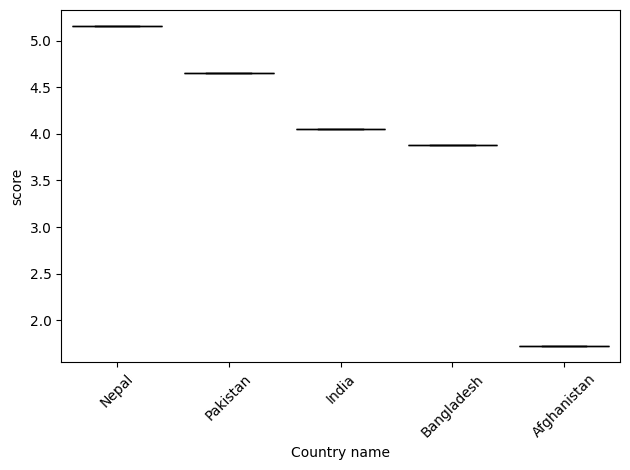

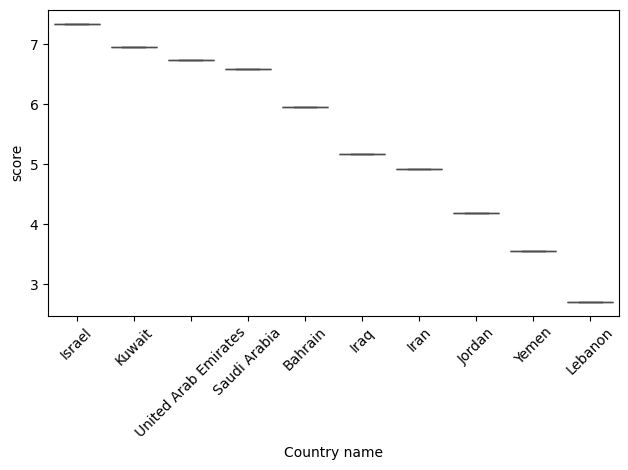

In [155]:
sns.boxplot(x='Country name',y='score',data=S_A_C,color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
sns.boxplot(x='Country name',y='score',data=mid_east,color='red')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
